In [25]:
import sys
sys.path.append('../')

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

%load_ext autoreload
%autoreload 2
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def mi_estimator(x1, x2):
    pos = torch.cat([x1, x2], 1)  # Positive Samples
    neg = torch.cat([torch.roll(x1, 1, 0), x2], 1)
    grad = -F.softplus(-pos).mean() - F.softplus(neg).mean()
    out = pos.mean() - neg.exp().mean() + 1
    return grad, out

In [27]:
batch_sz = 16

all_grad = []
all_out = []
for i in range(1000):
    x1 = torch.rand(16, 32, 1)
    x2 = torch.rand(16, 32, 1)
    if i > 500:
        x2 += 1
        x2 *= 1.5
    grad, out = mi_estimator(x1, x2)
    all_grad.append(grad.numpy())
    all_out.append(out.numpy())

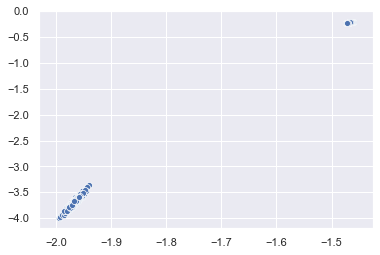

In [28]:
sns.scatterplot(all_grad, all_out)

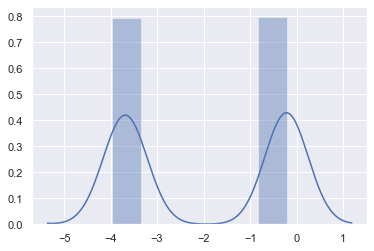

In [24]:
sns.distplot(all_out)